In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


print("preliminary analysis")
df = pd.read_excel('data.xlsx')

preliminary analysis


281.28491982653304


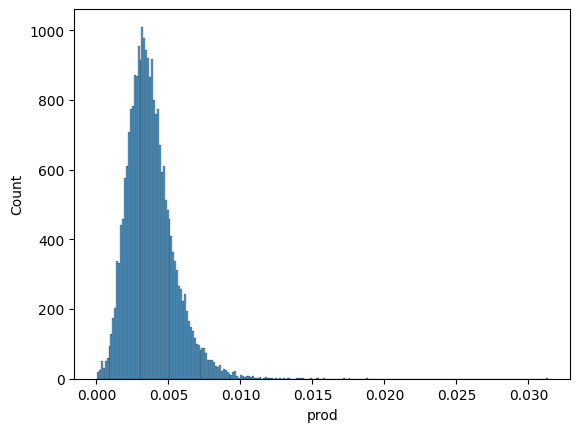

In [3]:
# Рассчитываем эффективность
df['efficiency'] = (
    df['all_system_fact']-df['break_fact']-df['additional_fact']
) / df['all_system_fact']



df["prod"] = (df["cnt_call"]+ df["cnt_chat"])/(df["dlg_time_call"] + df["dlg_time_chat"])
sns.histplot(df["prod"])
print(1/df["prod"].median())

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = df[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1                   # Межквартильный размах

    # Определяем границы для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтруем данные, оставляя только значения в пределах границ
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

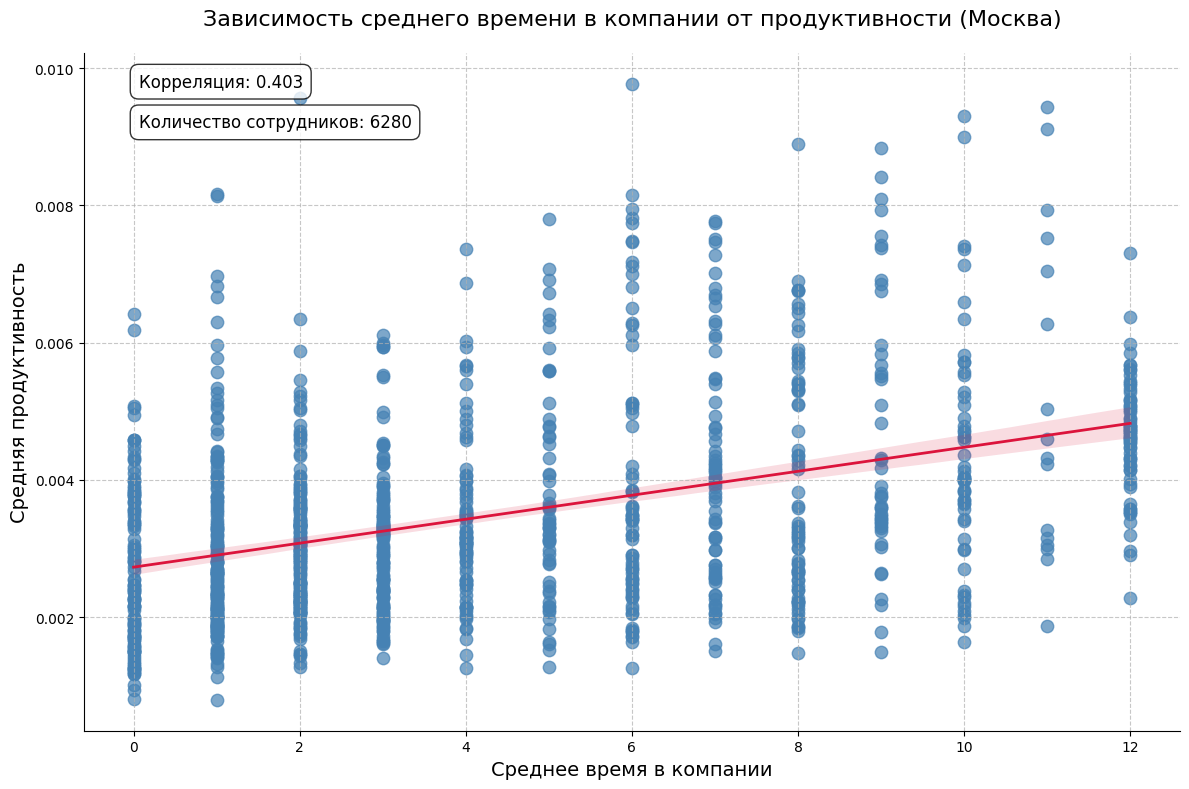

Количество сотрудников в Москве: 6280
Корреляция между продуктивностью и временем в компании: 0.403

Статистика по продуктивности:
count    1113.000000
mean        0.003503
std         0.001548
min         0.000793
25%         0.002322
50%         0.003226
75%         0.004288
max         0.009776
Name: prod, dtype: float64

Статистика по времени в компании:
count    6280.000000
mean        5.216720
std         3.689753
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        12.000000
Name: skill_group_exp, dtype: float64


In [11]:
#  Фильтруем данные только для Москвы
moscow_df = df[df["residential_city_nm"] == "г Москва"].copy()
df['id'] = list(range(len(df)))
df = remove_outliers_iqr(df, 'skill_group_exp')

# Группируем данные по employee_id и вычисляем средние значения
# Предполагаю, что у вас есть колонка с временем в компании, например 'company_time'
# Если такой колонки нет, замените ее на нужную вам
employee_stats = moscow_df.groupby('id').agg({
    'prod': 'median',
    'skill_group_exp': 'median'  # Замените на вашу колонку с временем в компании
}).reset_index()

# Создаем график
plt.figure(figsize=(12, 8))

# Scatter plot с регрессионной линией
sns.regplot(
    data=employee_stats,
    x='skill_group_exp',
    y='prod',  # Замените на вашу колонку
    scatter_kws={
        "alpha": 0.7,
        "s": 80,
        "color": "steelblue"
    },
    line_kws={
        "color": "crimson",
        "lw": 2
    }
)

# Улучшаем внешний вид графика
plt.title('Зависимость среднего времени в компании от продуктивности (Москва)', fontsize=16, pad=20)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.xlabel('Среднее время в компании', fontsize=14)  # Измените название по необходимости
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем аннотацию с коэффициентом корреляции
correlation = employee_stats['prod'].corr(employee_stats['skill_group_exp'])
plt.annotate(
    f"Корреляция: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Добавляем информацию о количестве сотрудников
plt.annotate(
    f"Количество сотрудников: {len(employee_stats)}",
    xy=(0.05, 0.89),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Настраиваем стиль
sns.despine()
plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print(f"Количество сотрудников в Москве: {len(employee_stats)}")
print(f"Корреляция между продуктивностью и временем в компании: {correlation:.3f}")
print("\nСтатистика по продуктивности:")
print(employee_stats['prod'].describe())
print("\nСтатистика по времени в компании:")
print(employee_stats['skill_group_exp'].describe())